In [1]:
#Let's do this

# 1.1 Import relevant libraries and packages

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder

# 1.2 Read data

In [2]:
train = pd.read_csv('house_train.csv')
test = pd.read_csv('house_test.csv')

# 2. Data Pre-processing 

In [221]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
X = train.drop(['Id','SalePrice'],axis=1)
y = train.SalePrice
#y = y.reset_index(drop=True)
X.shape, y.shape

((1460, 79), (1460,))

C:\Users\UB\AppData\Local\Temp\ipykernel_6400\3789284414.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


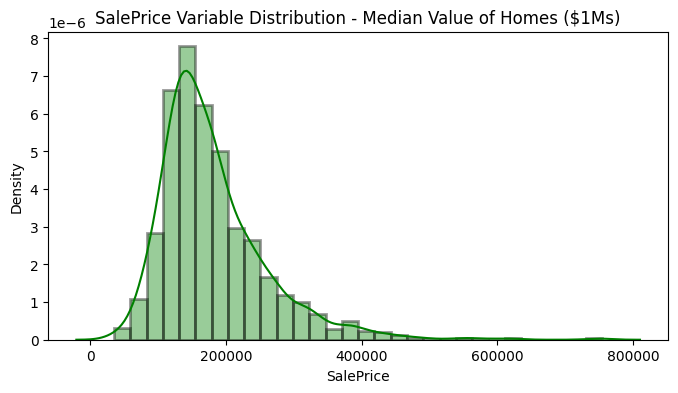

In [7]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(y, color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('SalePrice Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

C:\Users\UB\AppData\Local\Temp\ipykernel_2164\2411671578.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


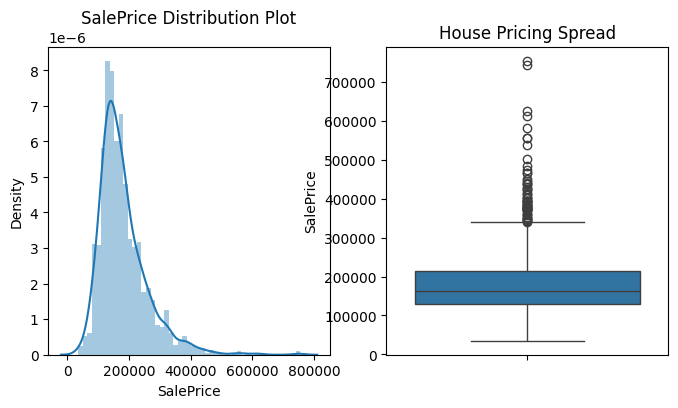

In [5]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('SalePrice Distribution Plot')
sns.distplot(y)

plt.subplot(1,2,2)
sns.boxplot(y)
plt.title('House Pricing Spread')

plt.show()

0

In [28]:
#determine the datetypes in the dataset

pd.DataFrame(train.dtypes).transpose()

# Select columns of data type 'category'
#categorical_columns = df.select_dtypes(include='category')

# If you want to convert certain columns to categorical, you can use:
# df['ColumnToConvert'] = df['ColumnToConvert'].astype('category')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


In [76]:
#Extracting categorical columns
categorical_columns = X.select_dtypes(include='object').columns.tolist()
int_col = X.select_dtypes(include='int64').columns.tolist()
float_col = X.select_dtypes(include='float64').columns.tolist()
print(f"categorical_columns: {len(categorical_columns)}. int_col: {len(int_col)}. float_col: {len(float_col)}")


categorical_columns: 43. int_col: 33. float_col: 3


In [36]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = X.shape

X.drop_duplicates(inplace=True)

if X.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-X.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [227]:
#Check for empty elements

nvc = pd.DataFrame(X.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/X.shape[0],3)*100
print(nvc)

               Total Null Values  Percentage
MSSubClass                     0         0.0
TotalBsmtSF                    0         0.0
Heating                        0         0.0
SaleType                       0         0.0
CentralAir                     0         0.0
1stFlrSF                       0         0.0
2ndFlrSF                       0         0.0
LowQualFinSF                   0         0.0
GrLivArea                      0         0.0
BsmtFullBath                   0         0.0
BsmtHalfBath                   0         0.0
FullBath                       0         0.0
HalfBath                       0         0.0
BedroomAbvGr                   0         0.0
KitchenAbvGr                   0         0.0
BsmtUnfSF                      0         0.0
KitchenQual                    0         0.0
Functional                     0         0.0
Fireplaces                     0         0.0
GarageCars                     0         0.0
GarageArea                     0         0.0
PavedDrive

In [4]:
#Separate the numerical, ordinal, nominal dataframes
#[Electrical,MasVnrArea,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageYrBlt,GarageType,GarageCond,LotFrontage,FireplaceQu,MasVnrType,Fence,Alley,MiscFeature,PoolQC]
numerical_columns = ['LotFrontage','LotArea','YearBuilt','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']
nominal_columns = ['MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating','Electrical','CentralAir','Functional', 'GarageType', 'Fence', 'MiscFeature','MoSold','SaleType','SaleCondition']
ordinal_columns = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC']

train_num_df = X[numerical_columns]
train_nom_df = X[nominal_columns]
train_ord_df = X[ordinal_columns]
len(numerical_columns)

34

In [ ]:
# Frequency (Count) Encoding
df['City_FrequencyEncoded'] = df['City'].map(df['City'].value_counts())

In [5]:
#NUMERICAL FEATURES
#fill numerical missing data using Sklearn.IterativeImputer algorithm
def numeric_impute(df):
    iter_imputer = IterativeImputer()
    num_imputed = iter_imputer.fit_transform(df)
    num_imputed_df = pd.DataFrame(num_imputed,columns = (iter_imputer.get_feature_names_out()))
    return num_imputed_df


#NOMINAL FEATURES
#Impute nominal data using SimpleImputer(strategry='constant', fill_value='None')
def nominal_impute(df):
    sim_imputer = SimpleImputer(strategy='constant', fill_value = 'None') #fill NaN with None
    nominal_imputed = sim_imputer.fit_transform(df)
    nominal_imputed_df = pd.DataFrame(nominal_imputed, columns = (sim_imputer.get_feature_names_out()))
    return nominal_imputed_df


#Encoding the nominal data using Binay_encoder
def encode_nominal(df, col):
    binary_encoder = ce.BinaryEncoder(cols=col)
    nominal_encode = binary_encoder.fit_transform(df)
    #nominal_encode_df = pd.DataFrame(nominal_encode, columns = (one_hot.get_feature_names_out()))
    return nominal_encode

#Encoding the nominal data using OneHotEncoder
def onehot_nominal(df):
    one_hot = OneHotEncoder(sparse_output = False)
    nominal_encode = one_hot.fit_transform(df)
    nominal_encode_df = pd.DataFrame(nominal_encode, columns = (one_hot.get_feature_names_out()))
    return nominal_encode_df

#ORDINAL DATA
#Imputing missing ordinal feature with None
def ordinal_impute(df):
    sim_imp = SimpleImputer(strategy='constant', fill_value='None')
    ord_imputed = sim_imp.fit_transform(df)
    ord_impute_df = pd.DataFrame(ord_imputed,columns=(sim_imp.get_feature_names_out()))
    return ord_impute_df

#Encoding ordinal feature using Sklearn-ordinalencoder
def encode_ordinal(df):
    ord_encode = OrdinalEncoder(categories =[['IR3','IR2','IR1','Reg'],['Sev','Mod','Gtl'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['None','No','Mn','Av','Gd'],['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['None','Unf','RFn','Fin'],['None','Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['N','P','Y'],['None','Fa','TA','Gd','Ex']])
    ord_encoded = ord_encode.fit_transform(df)
    ord_encode_df = pd.DataFrame(ord_encoded, columns =(ord_encode.get_feature_names_out()))
    return ord_encode_df

In [6]:
#numerical_column = ['LotFrontage','LotArea','YearBuilt','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']
numeric_df = numeric_impute(train_num_df)
numeric_df.shape

(1460, 34)

In [32]:
numeric_df.head(4)

,LotFrontage,LotArea,YearBuilt,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,65.0,8450.0,2003.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2008.0
1,80.0,9600.0,1976.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
2,68.0,11250.0,2001.0,7.0,5.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,2008.0
3,60.0,9550.0,1915.0,7.0,5.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2006.0


In [37]:

# Create subplots for histograms

def distribution_plot(df, columns):
    num_plots = len(columns)
    num_rows = (num_plots + 2) // 3  # Adjust the number of rows as needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(columns):
        axes[i].hist(df[column], bins=20, color='blue', alpha=0.7)
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    # Remove any empty subplots
    for i in range(num_plots, num_rows * 3):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()



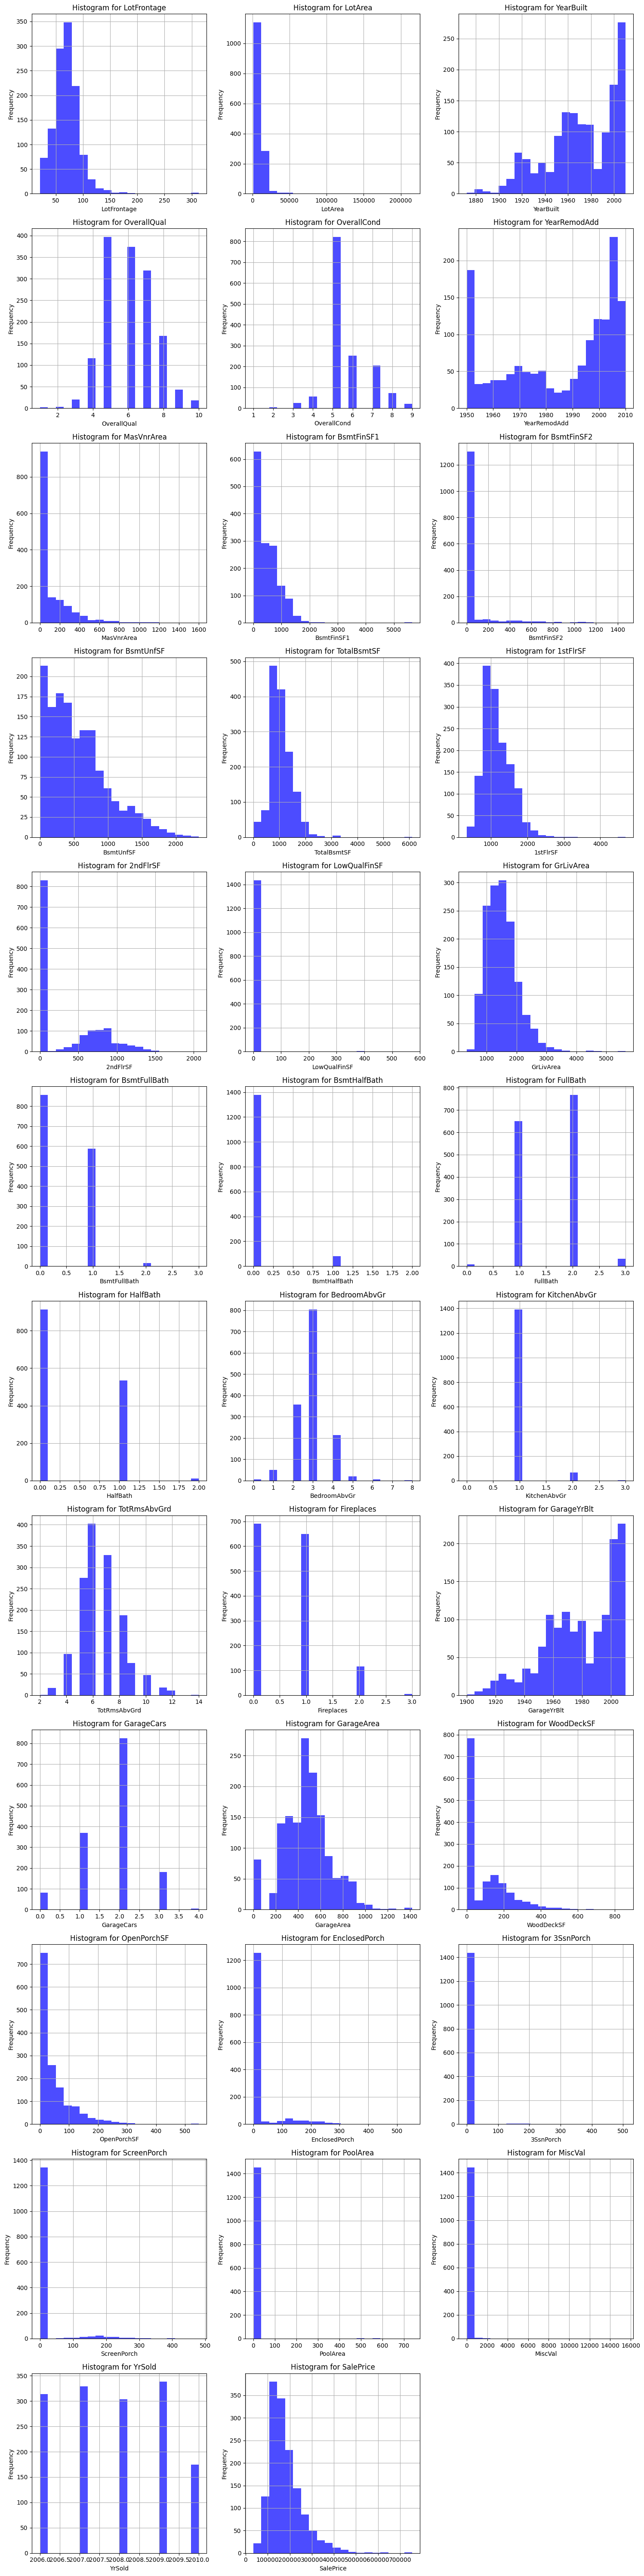

In [44]:
distribution_plot(train, numerical_column)

In [46]:
for column in numerical_columns:
    numeric_df[column].astype("int64")

In [52]:


for column in numerical_columns:
    # Calculate the upper boundary
    upper_boundary = numeric_df[column].mean() + 3 * numeric_df[column].std()
    lower_boundary = numeric_df[column].mean() - 3 * numeric_df[column].std()
    
    # Replace values greater than the upper boundary
    numeric_df.loc[numeric_df[column] > upper_boundary, column] = upper_boundary
    numeric_df.loc[numeric_df[column] < lower_boundary, column] = lower_boundary
numeric_df.head(3)

,LotFrontage,LotArea,YearBuilt,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,0.399548,0.332450,0.945827,0.626637,0.412948,0.883333,0.350991,0.406318,0.0,0.079761,0.376402,0.271615,0.517757,0.0,0.519040,0.507625,0.0,0.666667,0.531481,0.529012,0.464165,0.643966,0.000000,0.936207,0.5,0.495971,0.000000,0.277253,0.0,0.0,0.0,0.0,0.0,0.50
1,0.535757,0.385921,0.736875,0.502183,0.866822,0.433333,0.000000,0.562859,0.0,0.151014,0.554929,0.482870,0.000000,0.0,0.350050,0.000000,0.0,0.666667,0.000000,0.529012,0.464165,0.429311,0.395383,0.690150,0.5,0.416326,0.665993,0.000000,0.0,0.0,0.0,0.0,0.0,0.25
2,0.426789,0.462641,0.930349,0.626637,0.412948,0.866667,0.290105,0.279703,0.0,0.230774,0.404544,0.304916,0.525032,0.0,0.547708,0.507625,0.0,0.666667,0.531481,0.529012,0.464165,0.429311,0.395383,0.917981,0.5,0.550274,0.000000,0.190896,0.0,0.0,0.0,0.0,0.0,0.50


In [8]:
y = y.astype("float64")
upper_boundary = y.mean() + 3 * y.std()
lower_boundary = y.mean() - 3 * y.std()
    
# Replace values greater than the upper boundary
y[y > upper_boundary] = upper_boundary
y[y < lower_boundary] = lower_boundary
y.head(3)

0    208500.0
1    181500.0
2    223500.0
Name: SalePrice, dtype: float64

<Axes: >

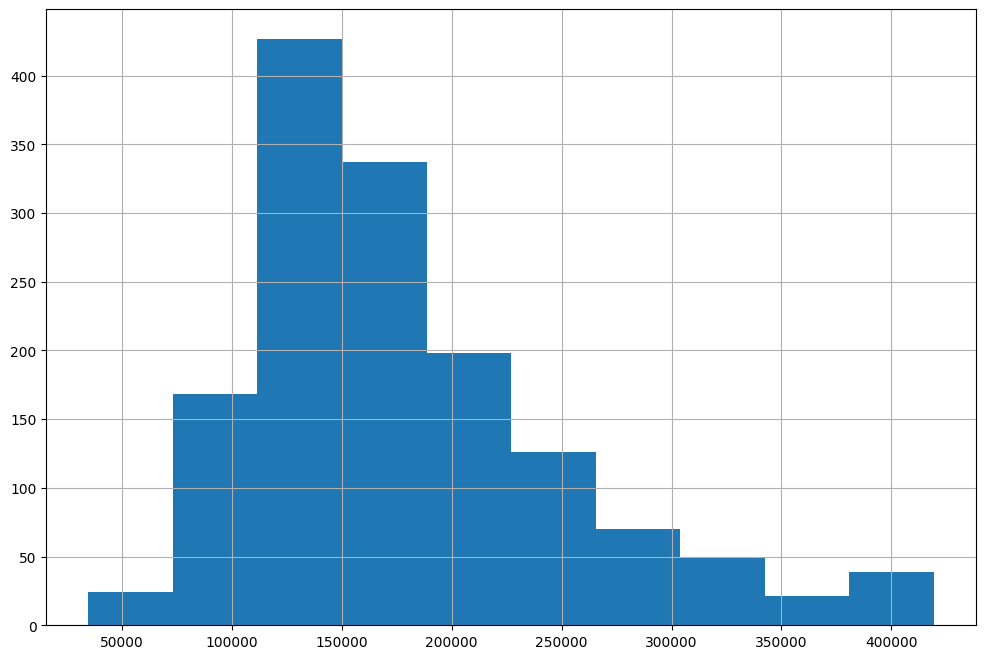

In [20]:
plt.figure(figsize=(12,8))
y.hist()

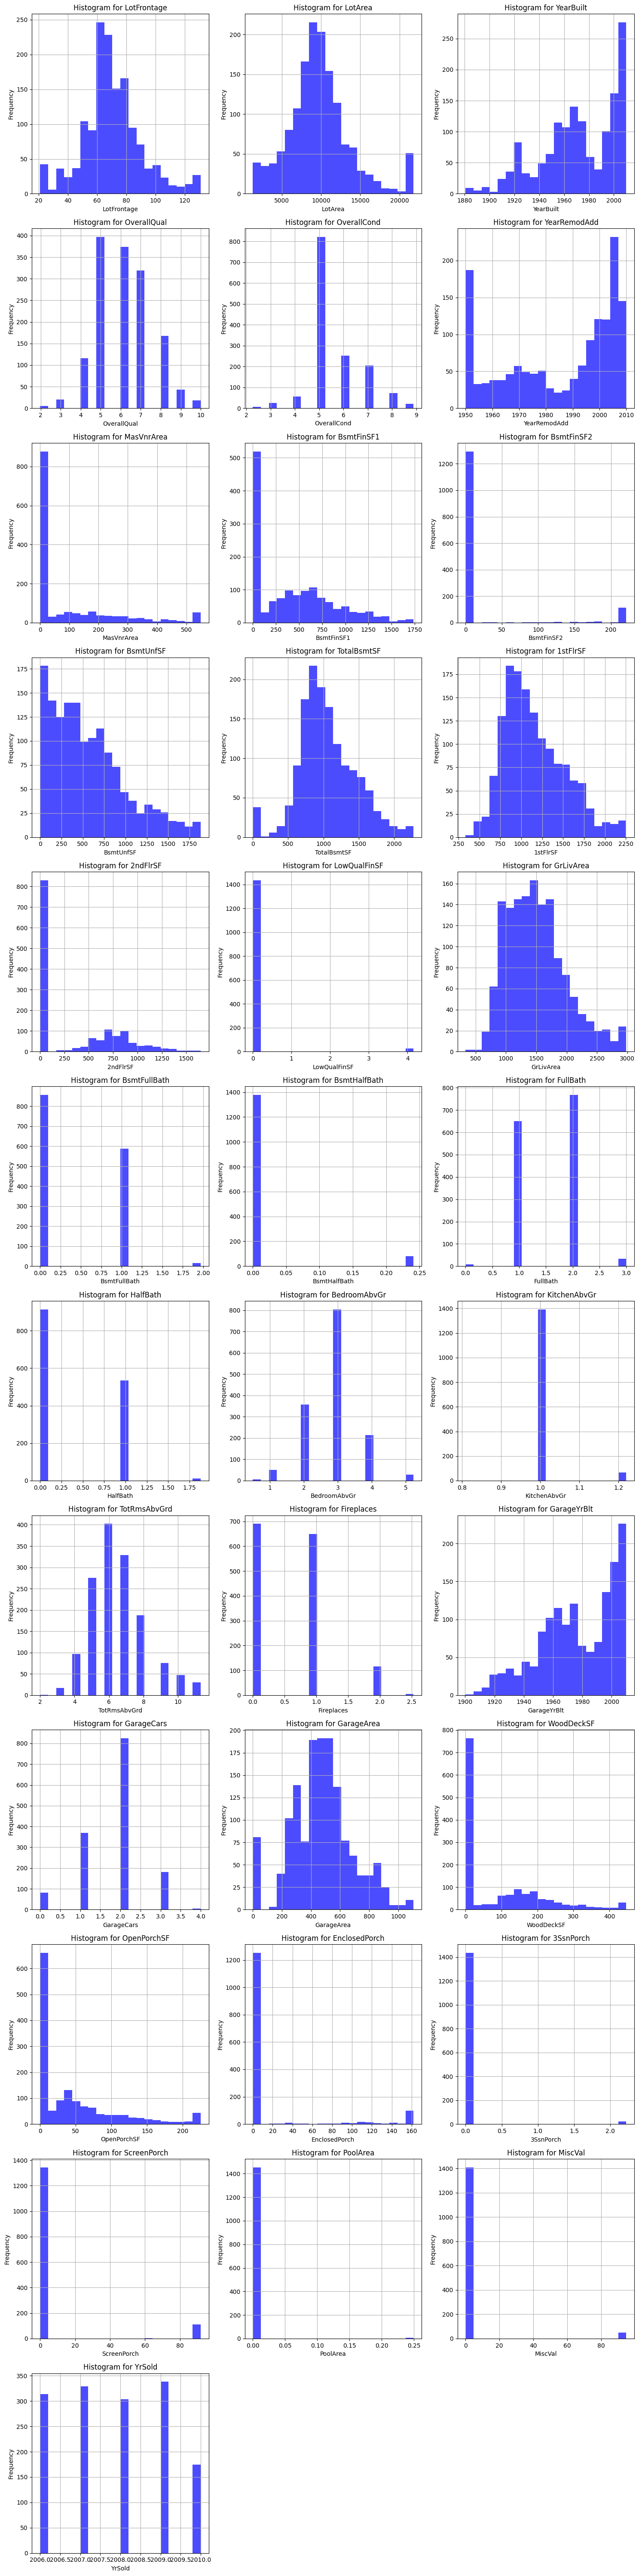

In [35]:
distribution_plot(numeric_df, numerical_columns)

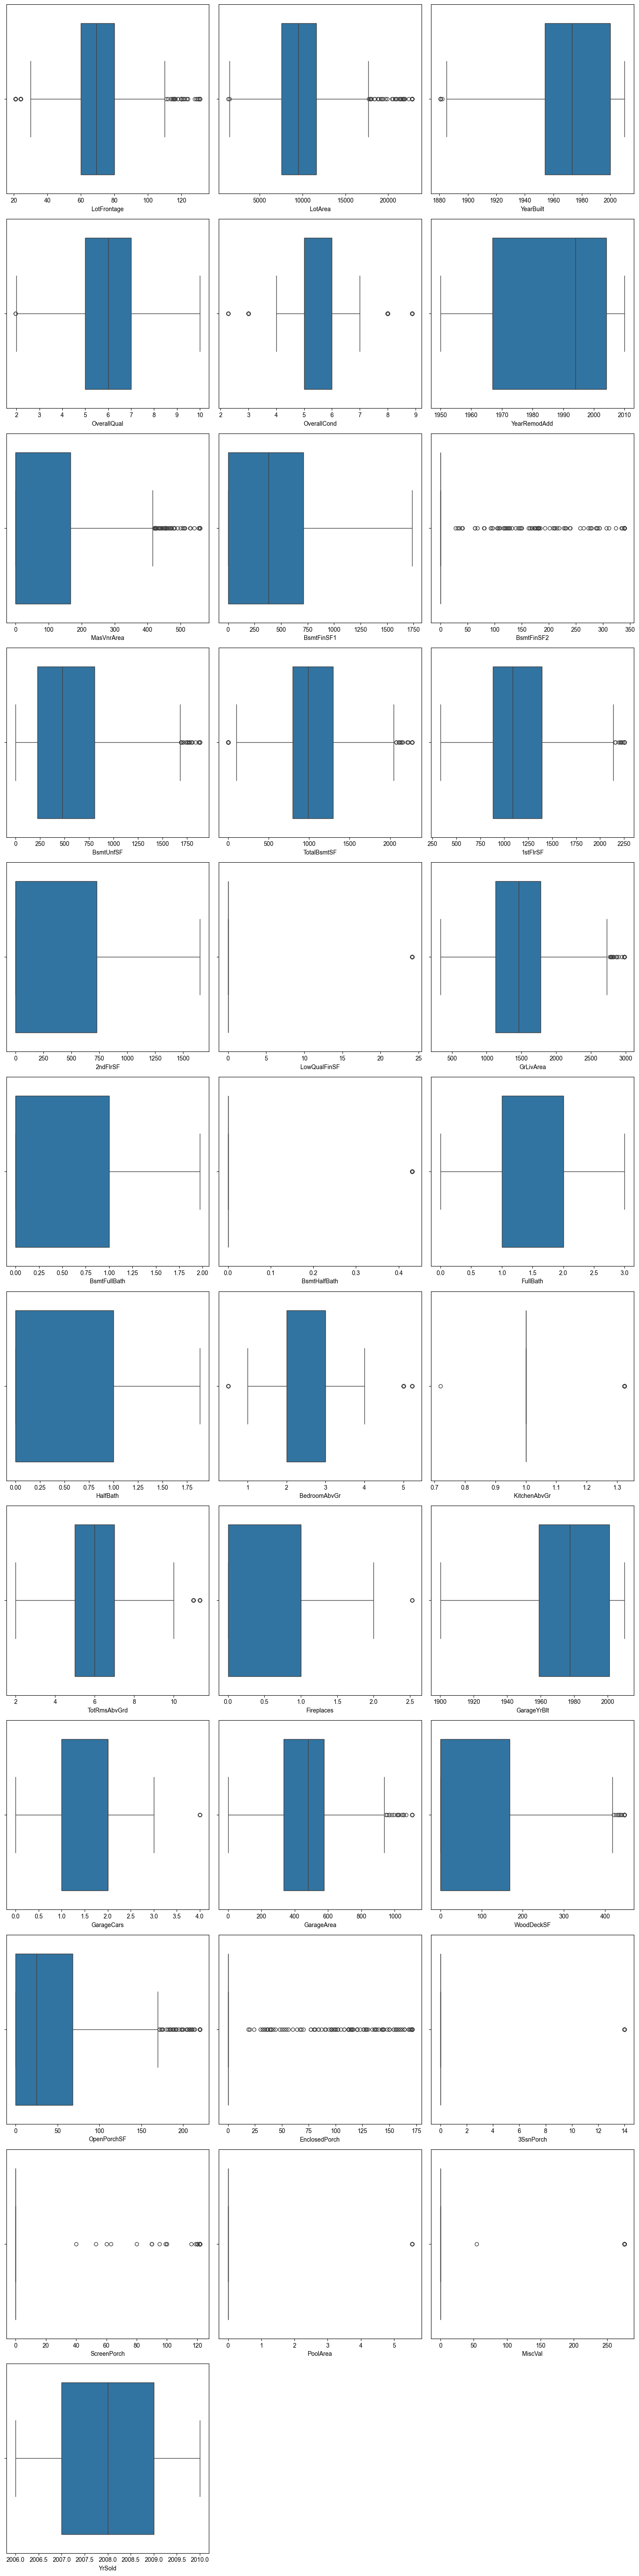

In [42]:
def outlier_plot(df, columns):
    num_plots = len(columns)
    num_rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
    
    # Remove any empty subplots
    for i in range(num_plots, num_rows * 3):
        if isinstance(axes, np.ndarray):
            axes[i // 3, i % 3].remove()
        else:
            axes.remove(axes[i])
    
    # Plot outliers for each column
    for i, column in enumerate(columns):
        if isinstance(axes, np.ndarray):
            sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
            sns.set_style("darkgrid", {'grid.color': 'b'})
        else:
            sns.boxplot(x=df[column], ax=axes[i])
            sns.set_style("darkgrid", {'grid.color': 'b'})
            
    plt.tight_layout()
    plt.show()

outlier_plot(numeric_df, numerical_columns)

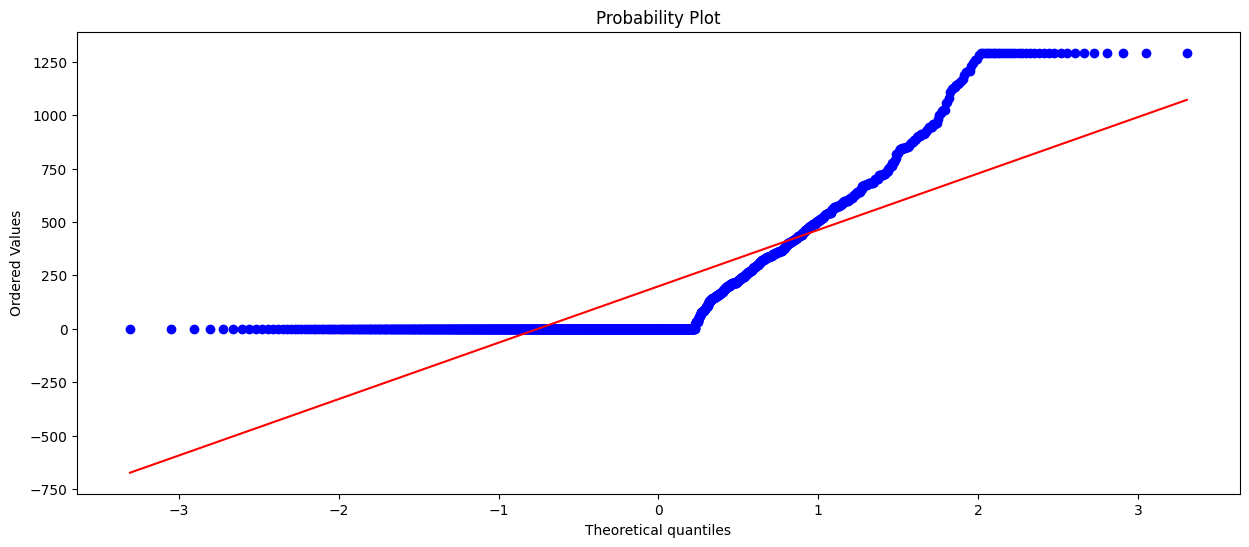

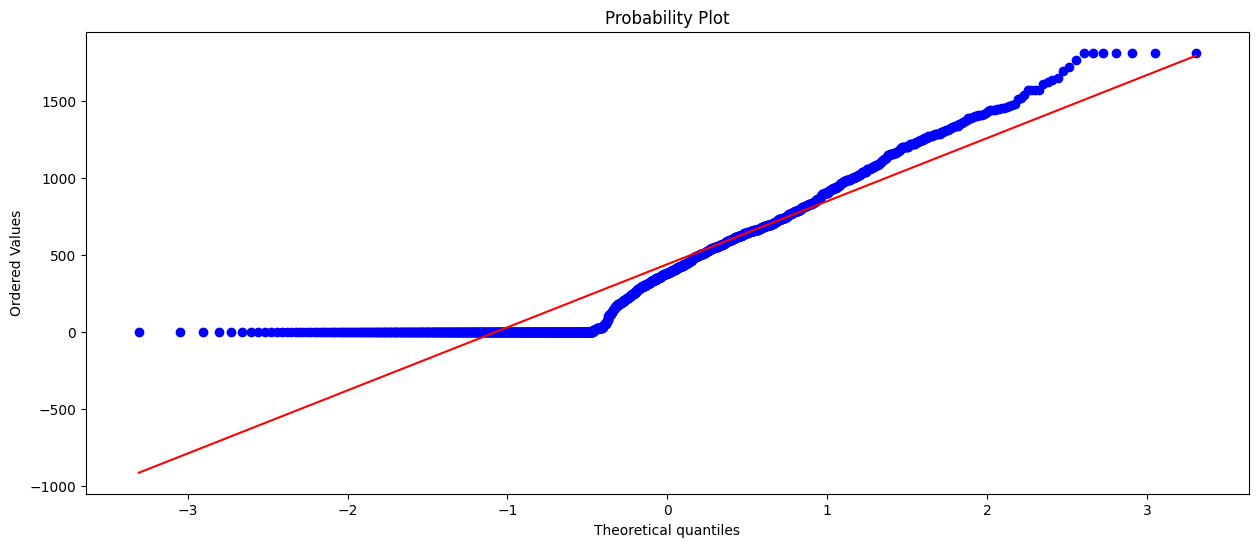

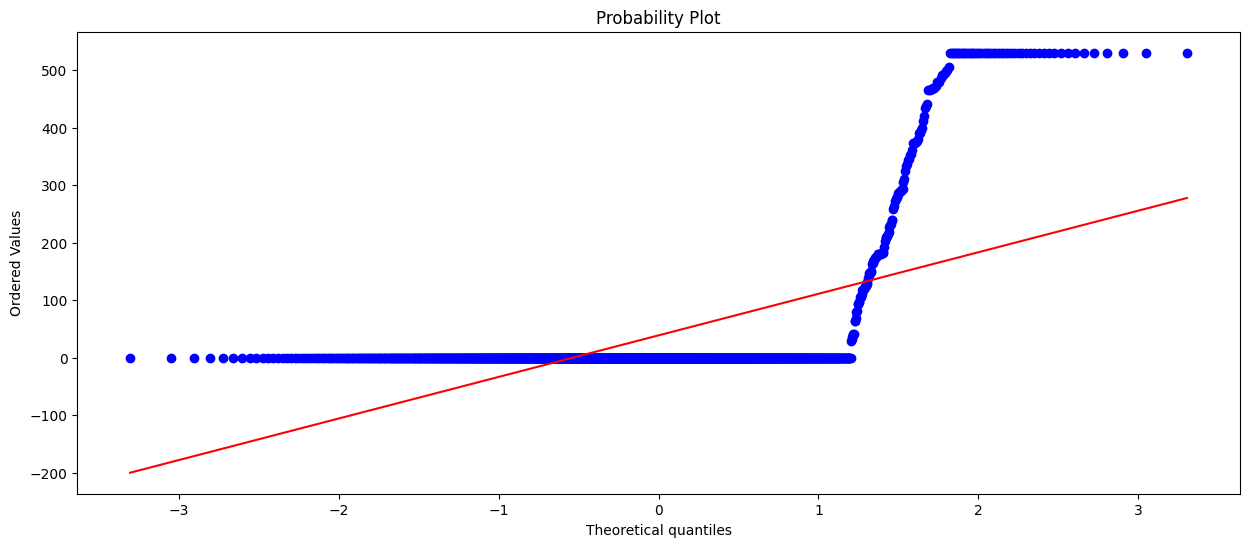

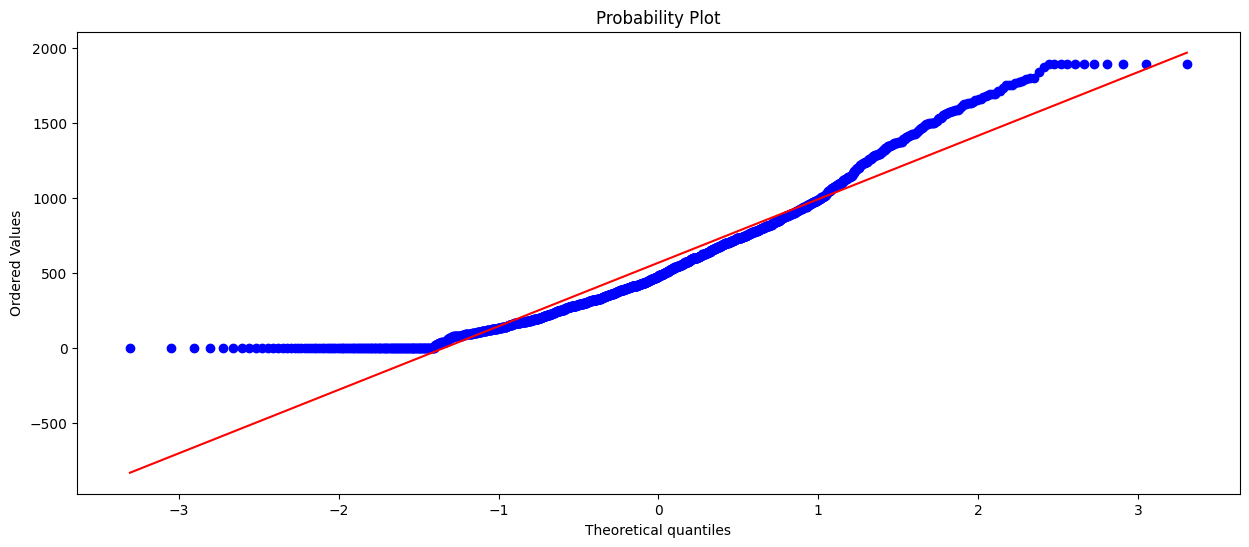

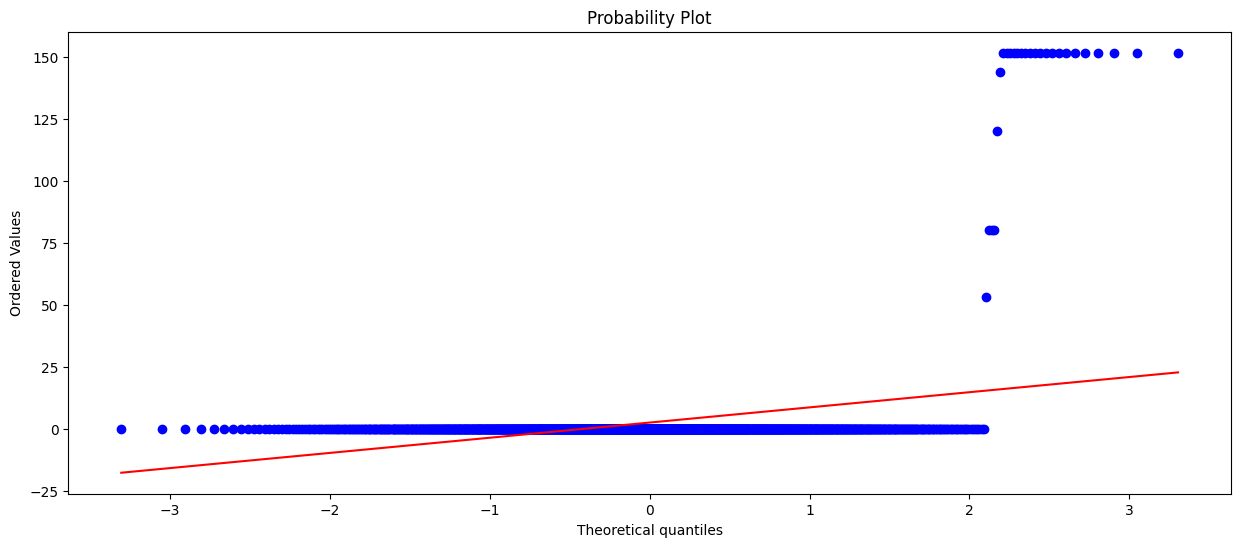

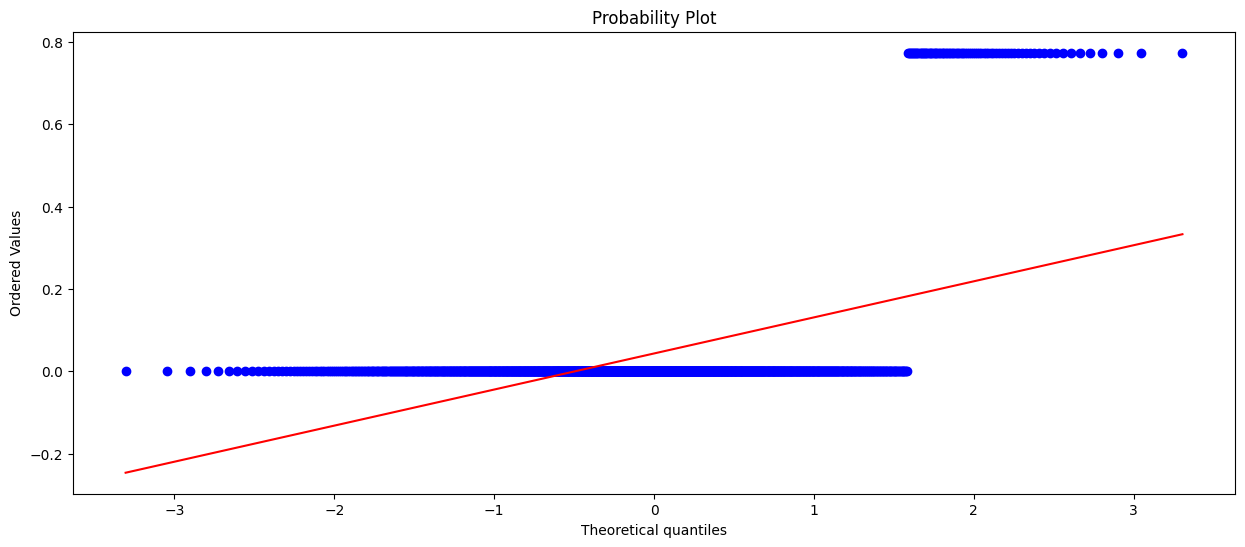

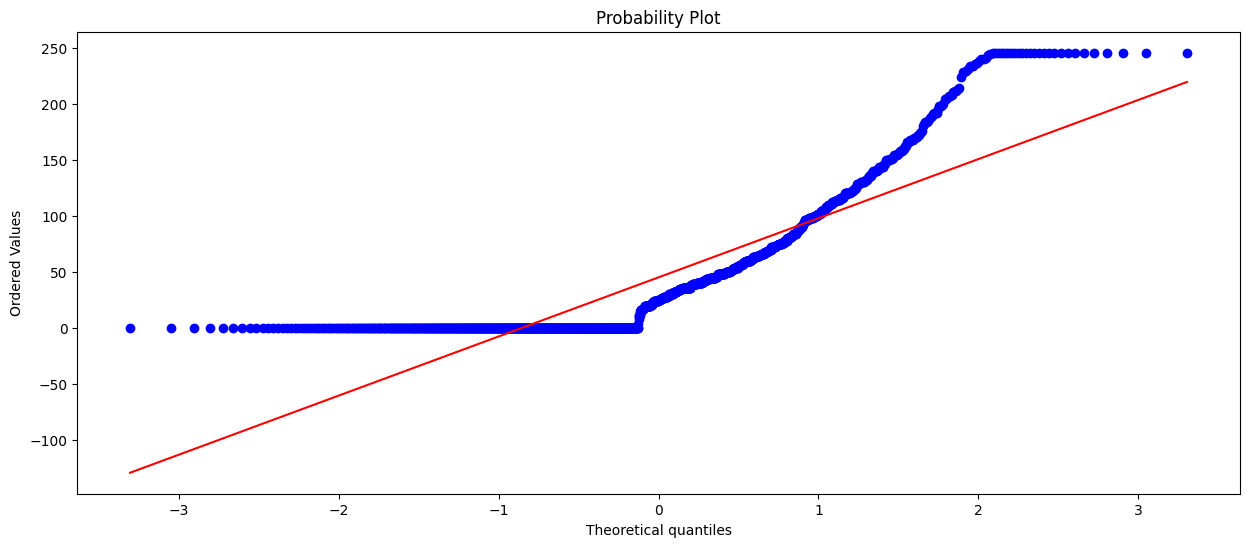

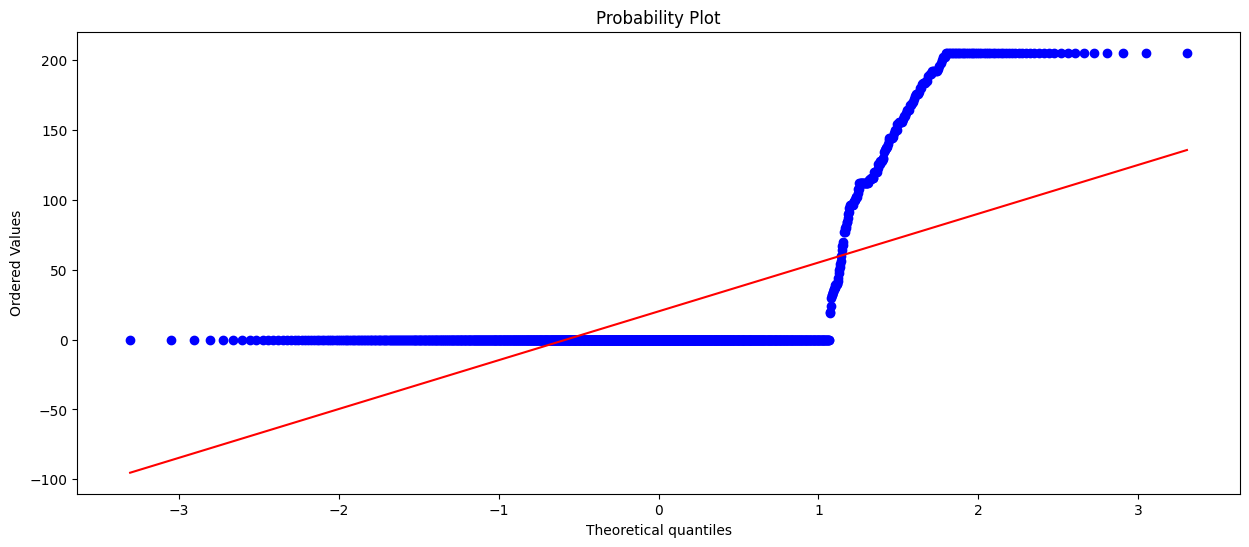

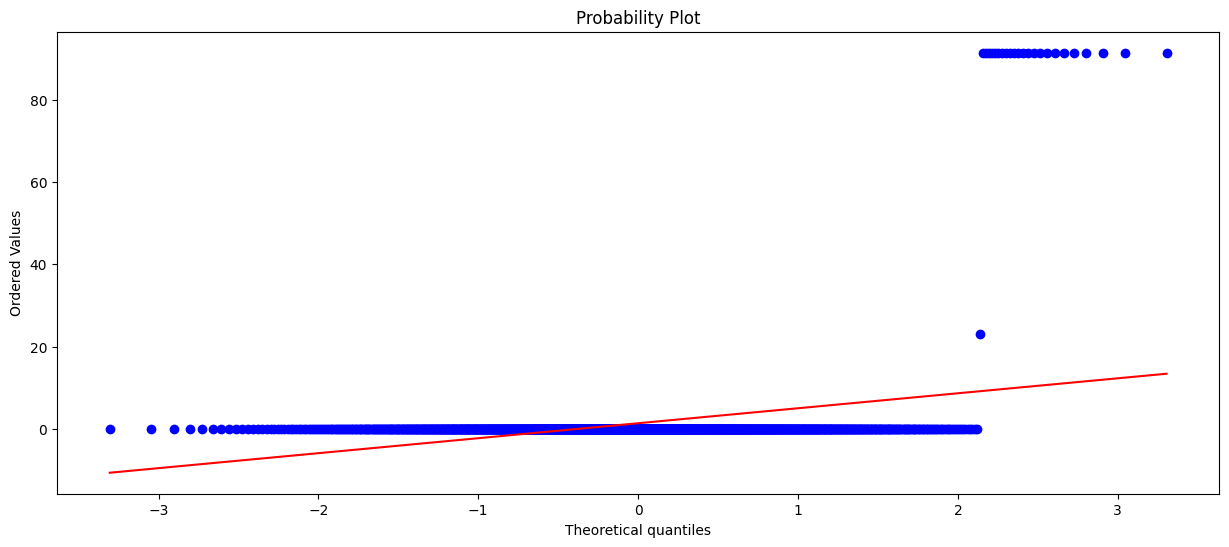

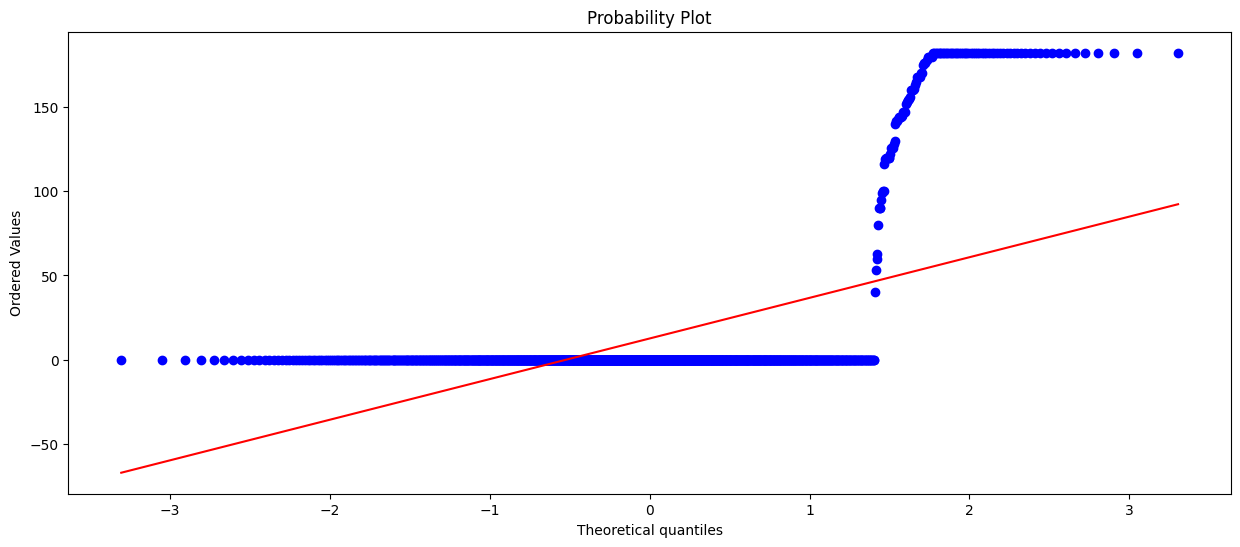

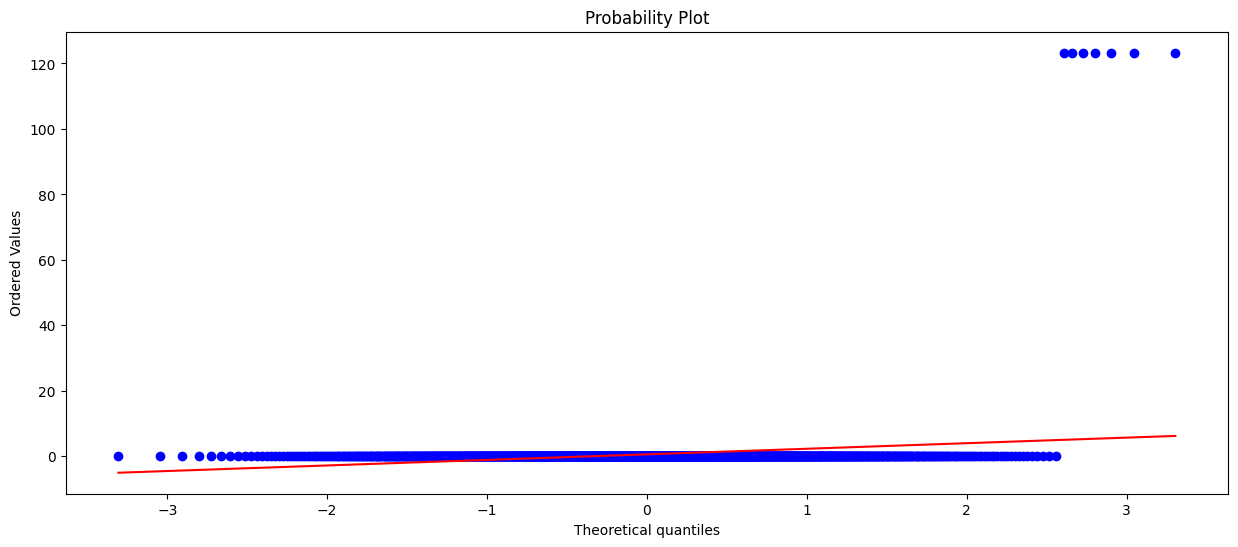

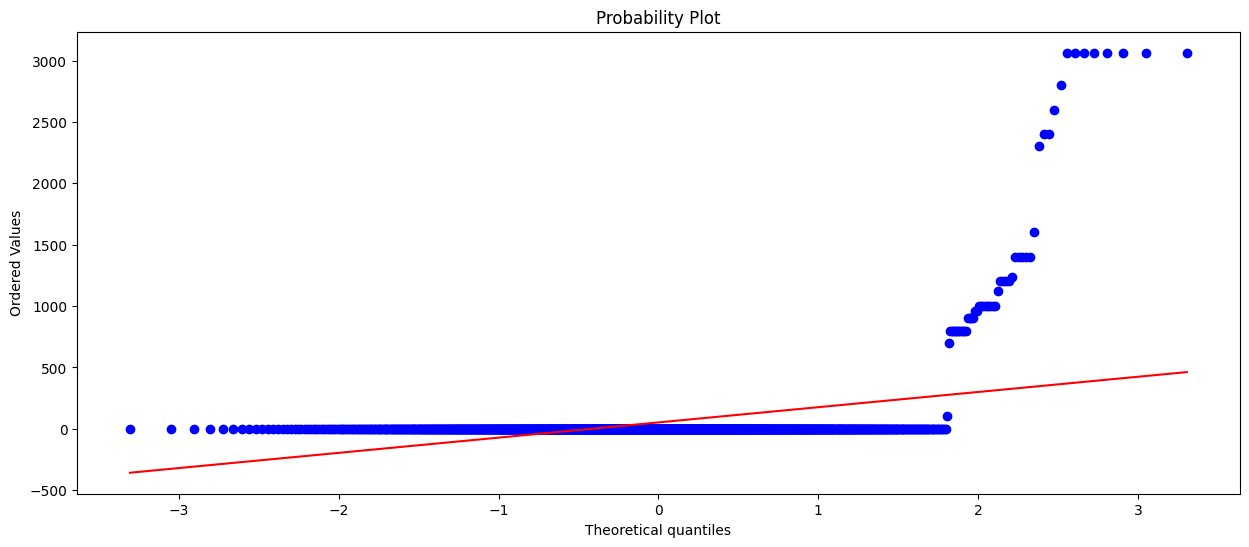

In [21]:
# plot the histograms to have a quick look at the distributions
# we can plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

diagnostic_plots(numeric_df, 'MasVnrArea')
diagnostic_plots(numeric_df, 'BsmtFinSF1')
diagnostic_plots(numeric_df, 'BsmtFinSF2')
diagnostic_plots(numeric_df, 'BsmtUnfSF')
#diagnostic_plots(numeric_df, b2)
diagnostic_plots(numeric_df, 'LowQualFinSF')
diagnostic_plots(numeric_df, 'BsmtHalfBath')
#diagnostic_plots(numeric_df, 'WoodDeckSF')
diagnostic_plots(numeric_df, 'OpenPorchSF')
diagnostic_plots(numeric_df, 'EnclosedPorch')
diagnostic_plots(numeric_df, '3SsnPorch')
diagnostic_plots(numeric_df, 'ScreenPorch')
diagnostic_plots(numeric_df, 'PoolArea')
diagnostic_plots(numeric_df, 'MiscVal')

In [32]:

numeric_df.WoodDeckSF = numeric_df.WoodDeckSF.astype('int64')
skewed_cols = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for column in skewed_cols:
    # Calculate the upper boundary
    IQR = numeric_df[column].quantile(0.75) - numeric_df[column].quantile(0.25)
    Lower_fence = numeric_df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = numeric_df[column].quantile(0.75) + (IQR * 3)
    # Replace values greater than the upper boundary
    numeric_df.loc[numeric_df[column] > Upper_fence, column] = Upper_fence
    numeric_df.loc[numeric_df[column] < Lower_fence, column] = Lower_fence
numeric_df[skewed_cols].head(3)

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtHalfBath,LowQualFinSF,BsmtHalfBath,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,392.0,706.0,0.0,150.0,0.0,0.0,0.0,0,61.0,0.0,0.0,0.0,0.0,0.0
1,0.0,978.0,0.0,284.0,0.0,0.0,0.0,298,0.0,0.0,0.0,0.0,0.0,0.0
2,324.0,486.0,0.0,434.0,0.0,0.0,0.0,0,42.0,0.0,0.0,0.0,0.0,0.0


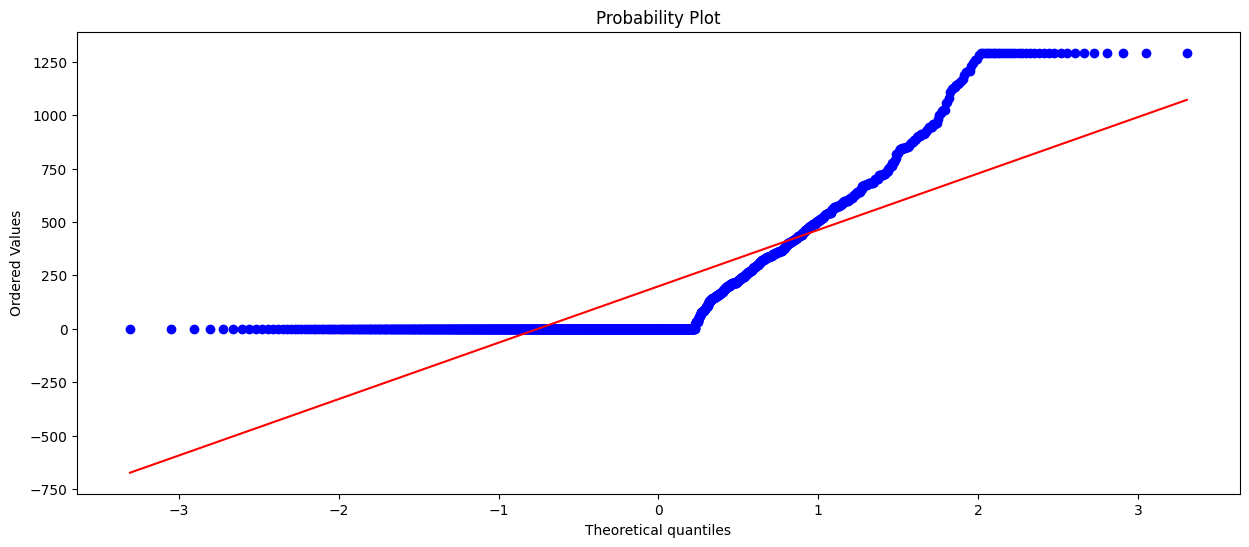

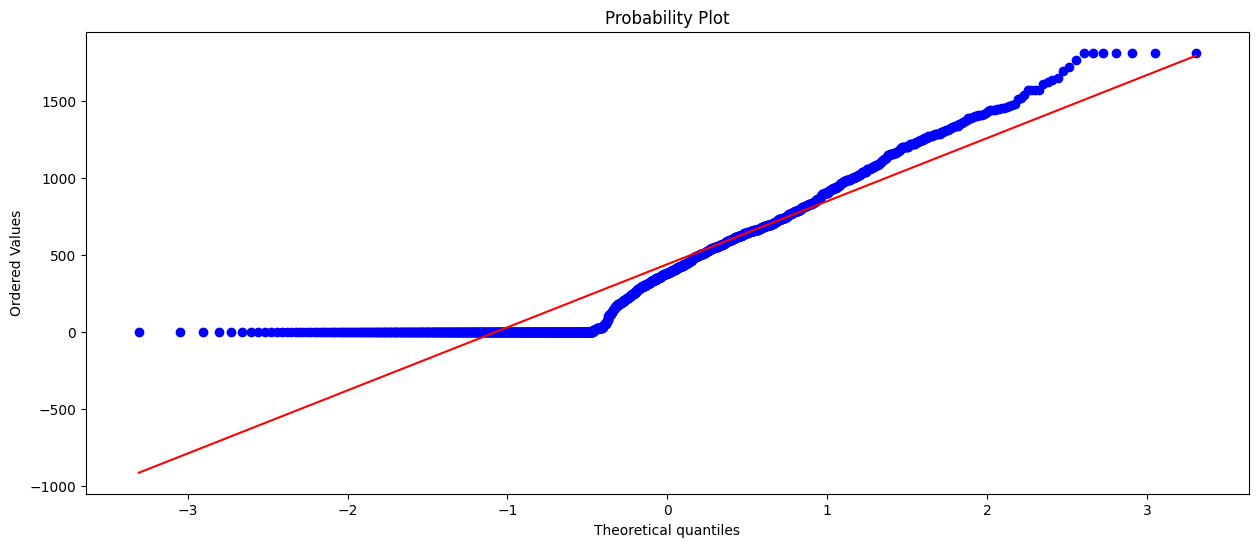

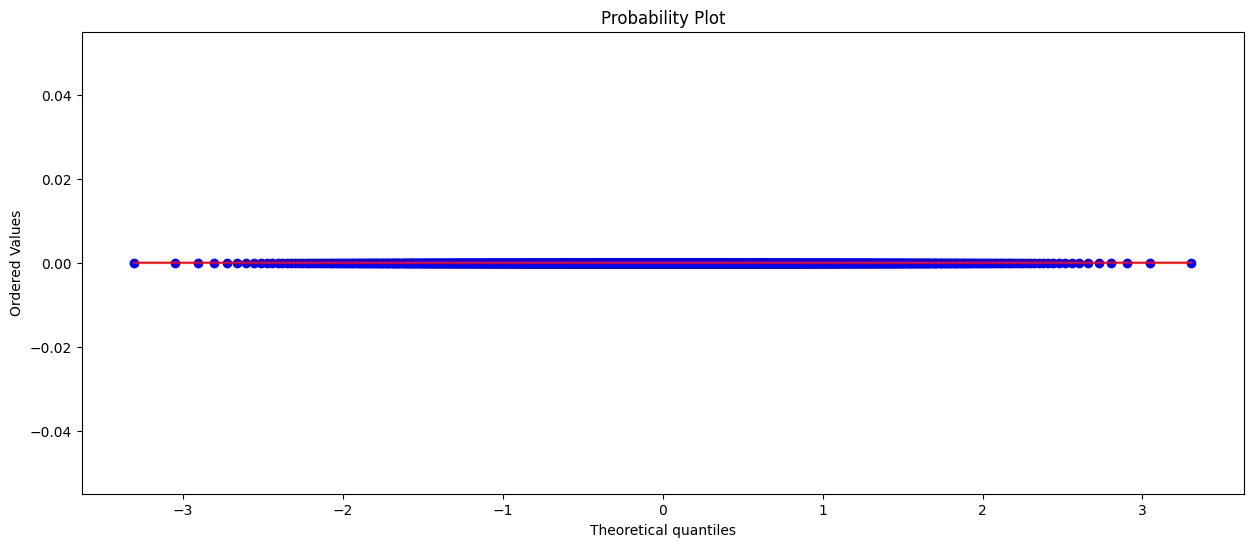

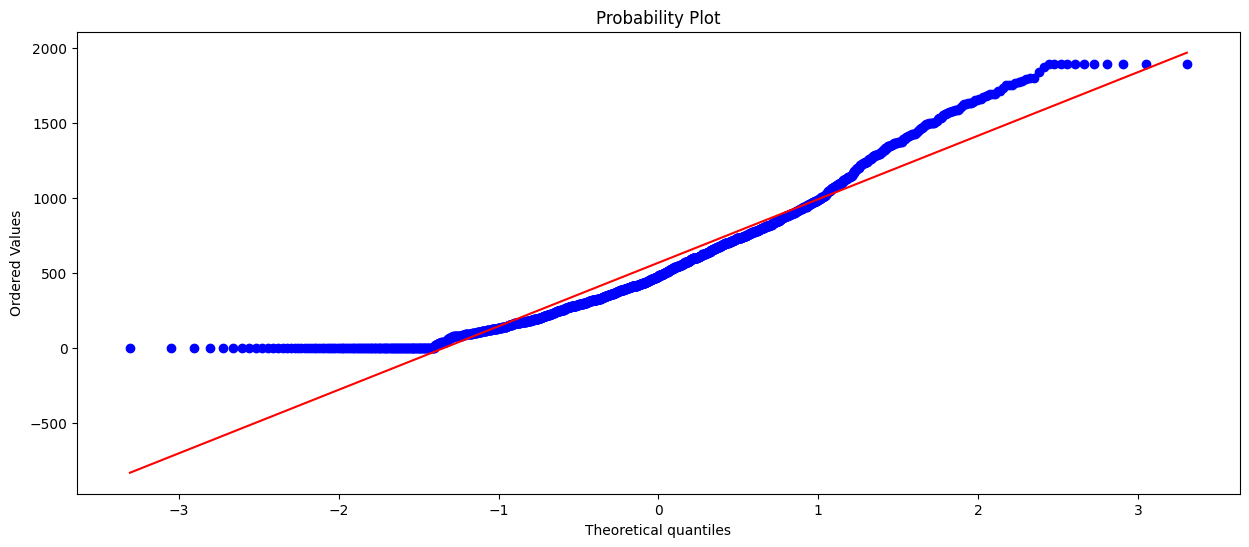

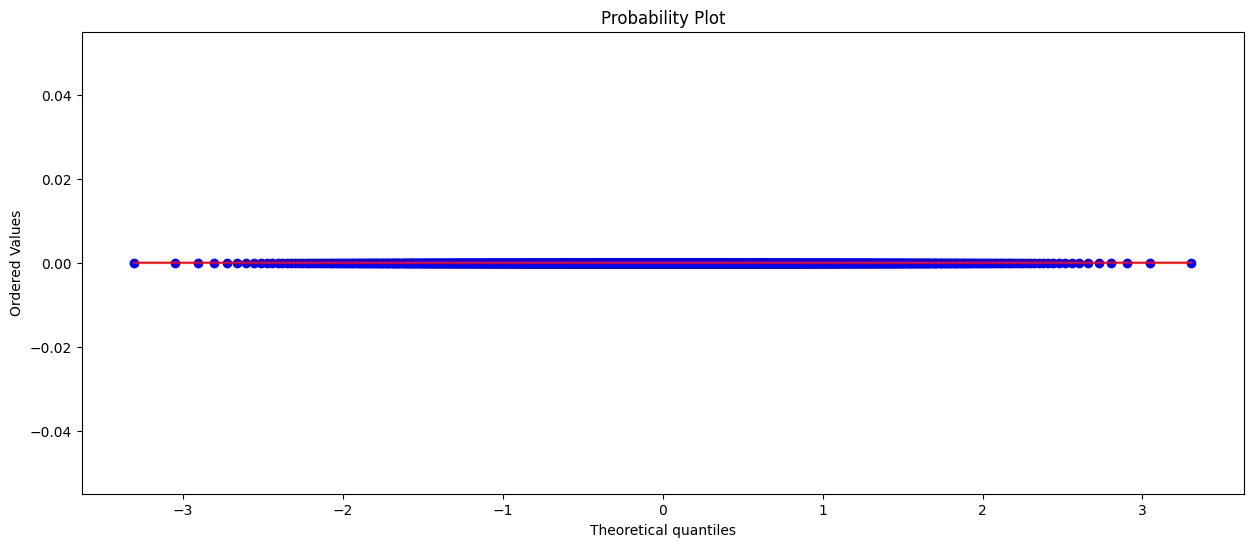

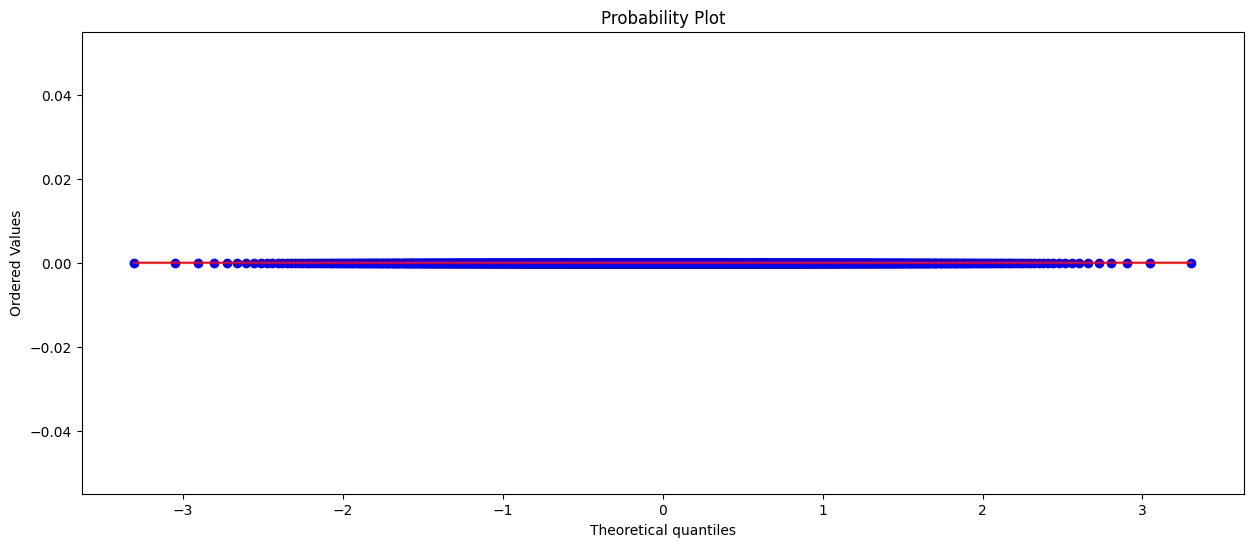

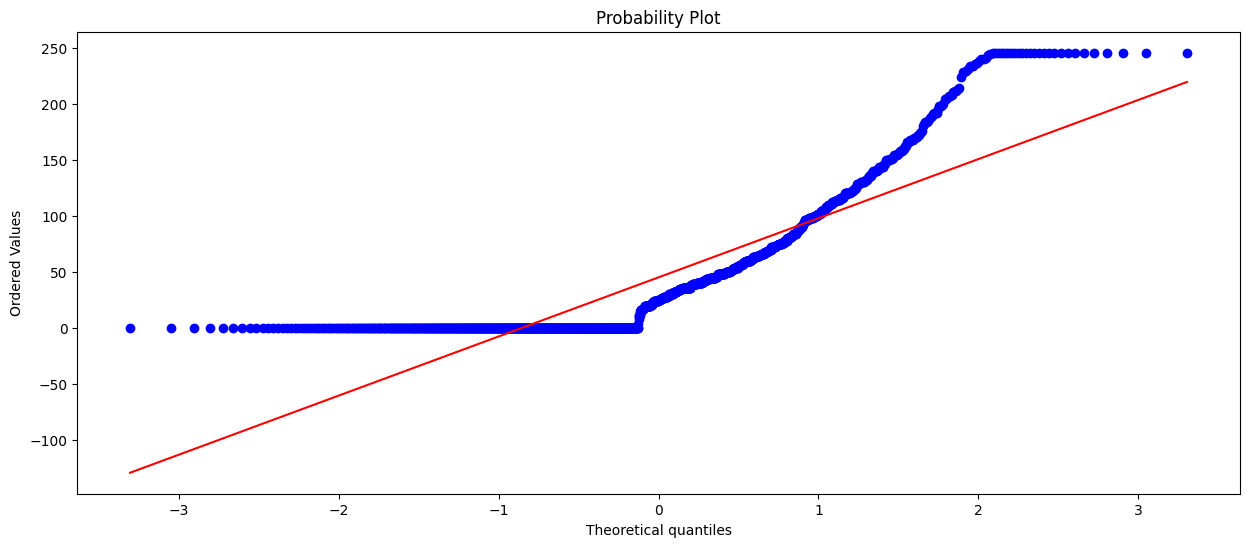

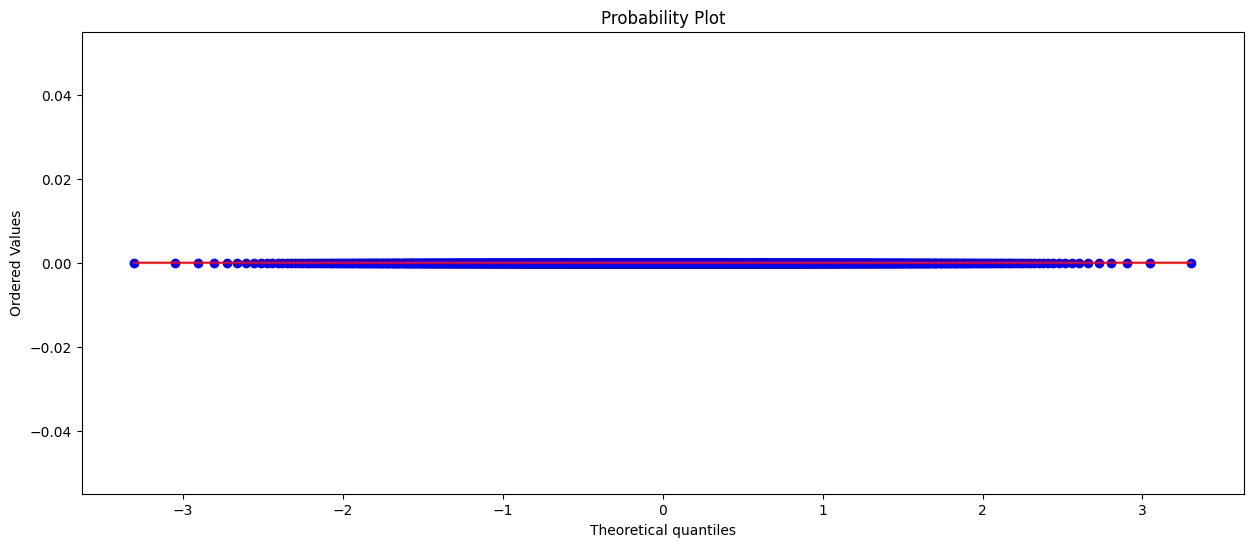

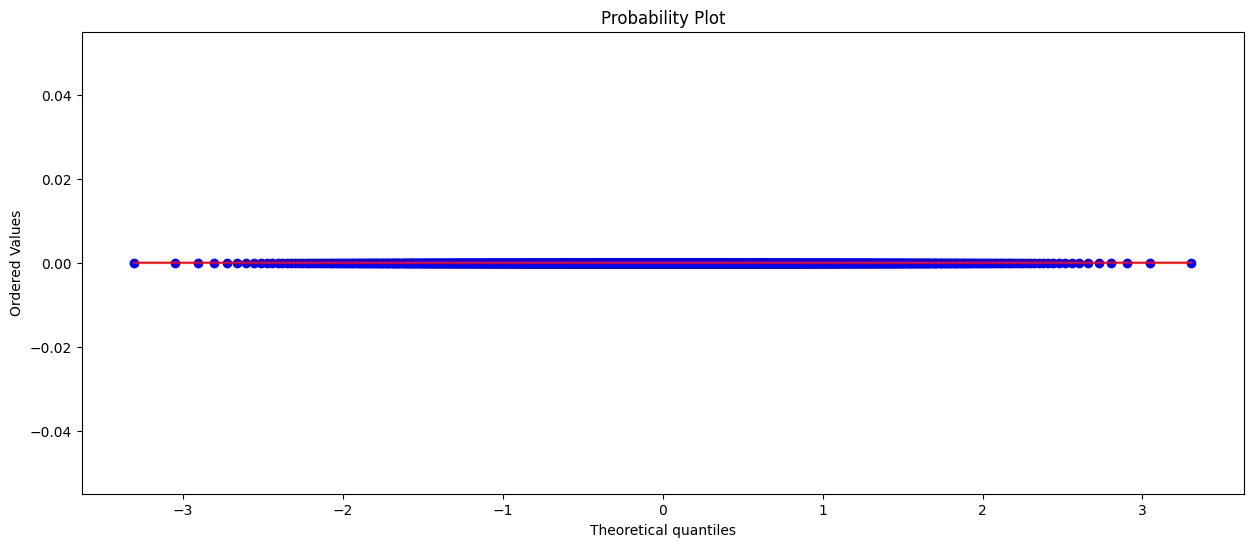

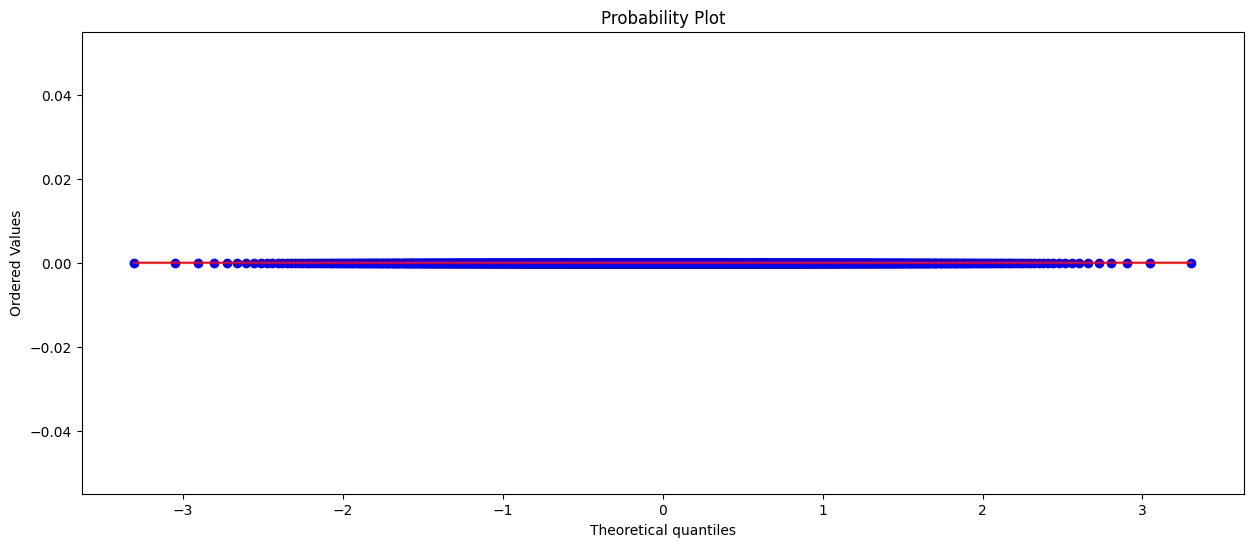

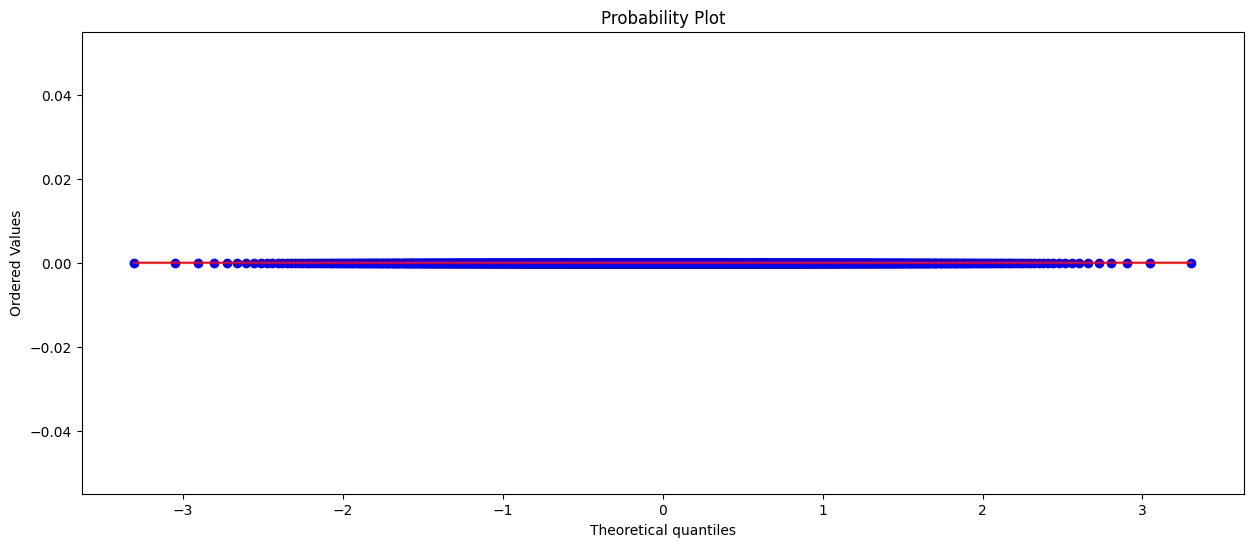

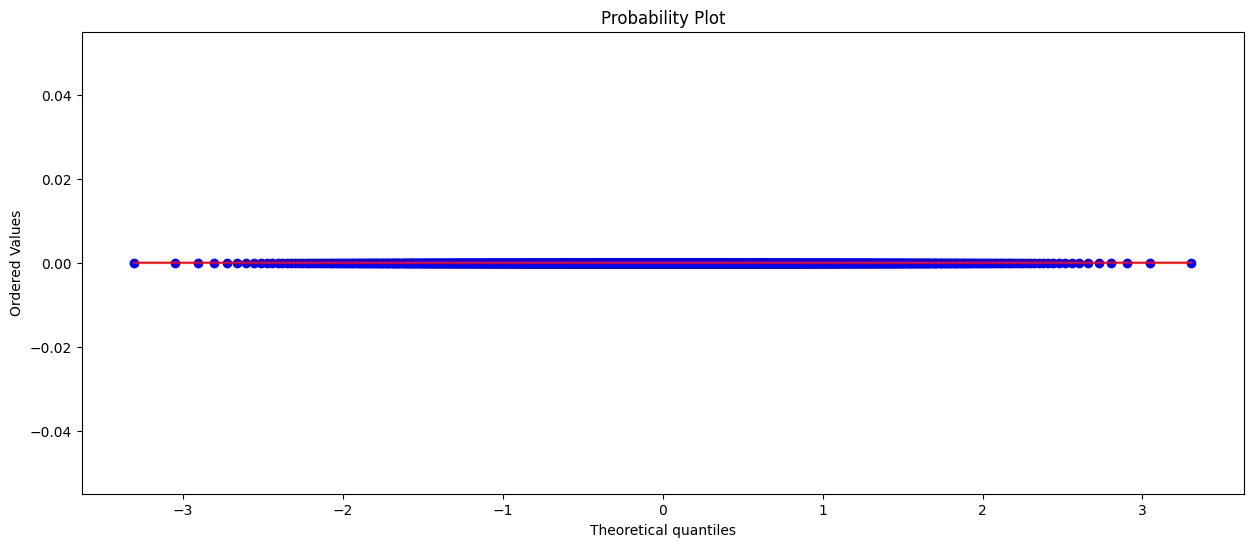

In [33]:
diagnostic_plots(numeric_df, 'MasVnrArea')
diagnostic_plots(numeric_df, 'BsmtFinSF1')
diagnostic_plots(numeric_df, 'BsmtFinSF2')
diagnostic_plots(numeric_df, 'BsmtUnfSF')
#diagnostic_plots(numeric_df, b2)
diagnostic_plots(numeric_df, 'LowQualFinSF')
diagnostic_plots(numeric_df, 'BsmtHalfBath')
#diagnostic_plots(numeric_df, 'WoodDeckSF')
diagnostic_plots(numeric_df, 'OpenPorchSF')
diagnostic_plots(numeric_df, 'EnclosedPorch')
diagnostic_plots(numeric_df, '3SsnPorch')
diagnostic_plots(numeric_df, 'ScreenPorch')
diagnostic_plots(numeric_df, 'PoolArea')
diagnostic_plots(numeric_df, 'MiscVal')

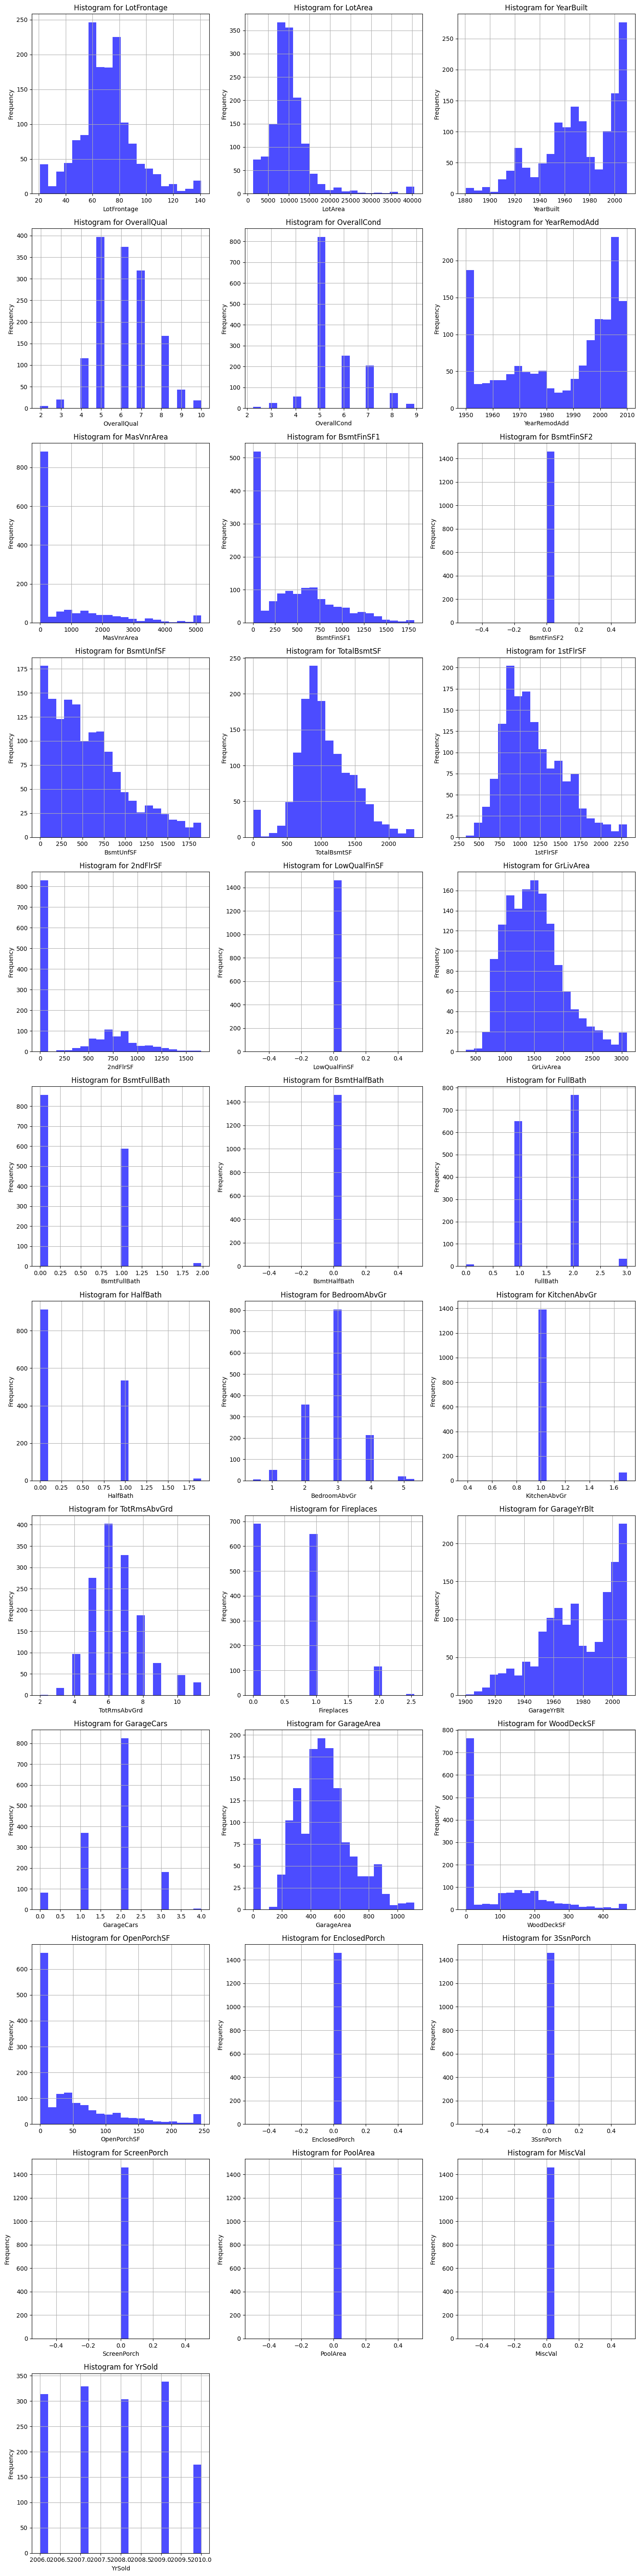

In [38]:
distribution_plot(numeric_df, numerical_columns)

In [53]:

for column in numerical_columns:
    numeric_df[column] = numeric_df[column]**1/(1/2)

In [95]:

numerical_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']
for column in numerical_columns:
    upper_boundary = numeric_df[column].mean() + 3 * numeric_df[column].std()
    lower_boundary = numeric_df[column].mean() - 3 * numeric_df[column].std()
    
    print(f'For column {column}:')
    print(f'Gaussian outliers are values < {lower_boundary} or > {upper_boundary}')

    iqr = numeric_df[column].quantile(0.75) - numeric_df[column].quantile(0.25)
    lower_fence = numeric_df[column].quantile(0.25) - (iqr * 3)
    upper_fence = numeric_df[column].quantile(0.75) + (iqr * 3)

    print(f'Frequency outliers are values < {lower_fence} or > {upper_fence}')
    print()

For column LotFrontage:
Gaussian outliers are values < 0.319454132179402 or > 140.88739879677502
Frequency outliers are values < 0.0 or > 140.0

For column LotArea:
Gaussian outliers are values < -19426.966714945673 or > 40460.62287932923
Frequency outliers are values < -4590.5 or > 23745.5

For column MasVnrArea:
Gaussian outliers are values < -438.0169953550015 or > 646.0928780179481
Frequency outliers are values < -498.0 or > 664.0

For column BsmtFinSF1:
Gaussian outliers are values < -924.6545464953858 or > 1811.9339985501804
Frequency outliers are values < -2136.75 or > 2849.0

For column BsmtFinSF2:
Gaussian outliers are values < -437.408503351132 or > 530.5071334881184
Frequency outliers are values < 0.0 or > 0.0

For column BsmtUnfSF:
Gaussian outliers are values < -758.3604549183984 or > 1892.8412768362068
Frequency outliers are values < -1532.0 or > 2563.0

For column TotalBsmtSF:
Gaussian outliers are values < -258.68652132361785 or > 2373.5454254332067
Frequency outliers a

In [ ]:
df[(df[‘cgpa’] > 8.80) | (df[‘cgpa’] < 5.11)]

In [115]:
#['LotFrontage','LotArea','YearBuilt','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']
#function to handle gaussian outliers
def treat_outlier_b(df, column):
    # Iterate through the columns and apply the operation
    for column in column:
        # Calculate the upper boundary
        upper_boundary = df[column].mean() + 3 * df[column].std()
    
        # Replace values greater than the upper boundary
        df.loc[df[column] > upper_boundary, column] = upper_boundary

#function to handle skewed outliers
def treat_outlier_fr(df, column):
    # Iterate through the columns and apply the operation
    for column in column:
        # Calculate the upper boundary
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        upper_fence = df[column].quantile(0.75) + (iqr * 3)
    
        # Replace values greater than the upper boundary
        df.loc[df[column] > upper_fence, column] = upper_fence


In [39]:
#impute and encode nominal features using OHE
impute_nom = nominal_impute(train_nom_df)
#nominal_encode = encode_nominal(impute_nom)
# let's have a look at how many labels

nominal_encode = encode_nominal(train_nom_df, nominal_columns)
print(nominal_encode.shape)

(1460, 89)


In [40]:
#impute and encode ordinal data
impute_ord = ordinal_impute(train_ord_df)
ordinal_encode = encode_ordinal(impute_ord)
print(ordinal_encode.shape)

(1460, 17)


In [54]:
full_encoded_train = pd.concat([numeric_df,nominal_encode,ordinal_encode],axis=1)
full_encoded_train.shape

(1460, 140)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_df[numerical_columns] = scaler.fit_transform(numeric_df[numerical_columns])

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)

In [43]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [55]:
np.random.seed(0)
print(cross_val_score(GradientBoostingRegressor(random_state=0,n_estimators = 750,
                              min_samples_split= 2,
                                learning_rate =  0.11,
                              max_depth=3),full_encoded_train,y,cv=5).mean()*100)

90.41547634500502


In [137]:
#TEST DATA FOR PREDICTION

In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
test_df = test.drop('Id',axis=1)

In [26]:
len(nominal_columns + ordinal_columns + numerical_columns) == len(list(test_df.columns))

False

In [141]:
test_num_df = test_df[numerical_columns]
test_nom_df = test_df[nominal_columns]
test_ord_df = test_df[ordinal_columns]

In [142]:
test_df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [143]:
#impute numerical test data
num_test_impute = numeric_impute(test_num_df)
num_test_impute.isnull().sum()

C:\Users\Samfield\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


LotFrontage      0
LotArea          0
YearBuilt        0
OverallQual      0
OverallCond      0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
YrSold           0
dtype: int64

In [144]:
#impute and encode nominal data or features
nom_test_impute = nominal_impute(test_nom_df)
nom_test_enc = encode_nominal(nom_test_impute)
nom_test_enc.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.

In [145]:
ordinal_columns

['LotShape',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC']

In [146]:
ord_test_impute = ordinal_impute(test_ord_df)


In [147]:
ord_test_impute.KitchenQual.mode()[0]

'TA'

In [148]:
#impute and encode ordinal data or features
ord_test_impute = ordinal_impute(test_ord_df)
#there was an error, kitchenqual wasnt missing in train, but missed in test and was replaced with None
#replace None with mode
#replacing a value ---- df['column name'] = df['column name'].replace(['old value'], 'new value')
ord_test_impute.KitchenQual = ord_test_impute.KitchenQual.replace(['None'], 'TA')


#encode ordinal features
ord_test_enc = encode_ordinal(ord_test_impute)

In [149]:
ord_test_impute.KitchenQual.unique()  #done!!!

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [150]:
full_encoded_test = pd.concat([num_test_impute,nom_test_enc,ord_test_enc],axis=1)
full_encoded_test.head()

,LotFrontage,LotArea,YearBuilt,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
0,80.0,11622.0,1961.0,5.0,6.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,2010.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [151]:
np.random.seed(42)
full_encoded_test.LotArea = np.log(full_encoded_test.LotArea)
full_encoded_test.LotFrontage = np.log(full_encoded_test.LotFrontage)
full_encoded_test.YearBuilt = np.log(full_encoded_test.YearBuilt)
full_encoded_test.OverallCond = np.log(full_encoded_test.OverallCond)
full_encoded_test.head()

,LotFrontage,LotArea,YearBuilt,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
0,4.382027,9.360655,7.581210,5.0,1.791759,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,2010.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [152]:
full_encoded_train.shape, full_encoded_test.shape

((1460, 256), (1459, 246))

In [156]:
len(full_encoded_test.columns)== len(set(full_encoded_test.columns)) , len(full_encoded_train.columns)== len(set(full_encoded_train.columns))

(True, True)

In [159]:
l1 = list(full_encoded_train.columns)
l2 = list(full_encoded_test.columns)

In [198]:
add2 = [value for value in l1 if value not in l2]
add = [i for i in l2 if i not in l1]

len(add2), len(add)

(17, 7)

In [205]:
full_encoded_train[add] = np.zeros(shape=(len(full_encoded_train),len(add)))
full_encoded_test[add2] = np.zeros(shape=(len(full_encoded_test),len(add2)))


In [206]:
full_encoded_train.shape, full_encoded_test.shape

((1460, 263), (1459, 263))

In [207]:
pd.DataFrame({'train': sorted(list(full_encoded_train.columns)),
              'test' : sorted(list(full_encoded_test.columns))})

,train,test
0,1stFlrSF,1stFlrSF
1,2ndFlrSF,2ndFlrSF
2,3SsnPorch,3SsnPorch
3,Alley_Grvl,Alley_Grvl
4,Alley_None,Alley_None
5,Alley_Pave,Alley_Pave
6,BedroomAbvGr,BedroomAbvGr
7,BldgType_1Fam,BldgType_1Fam
8,BldgType_2fmCon,BldgType_2fmCon
9,BldgType_Duplex,BldgType_Duplex


In [208]:
full_encoded_train = full_encoded_train.reindex(sorted(full_encoded_train.columns),axis=1)
full_encoded_test = full_encoded_test.reindex(sorted(full_encoded_test.columns),axis=1)

In [209]:
model = GradientBoostingRegressor(random_state=0,n_estimators = 750,
                              min_samples_split= 2,
                                learning_rate =  0.11,
                              max_depth=3)

In [210]:
model.fit(full_encoded_train,y)

GradientBoostingRegressor(learning_rate=0.11, n_estimators=750, random_state=0)

In [216]:
SalePrice2 = model.predict(full_encoded_test)
SalePrice2

array([121800.27631918, 156175.47642759, 184901.65620082, ...,
       168586.80786001, 119680.36359598, 214522.81535902])

In [226]:
SalePrice = pd.DataFrame(test.Id)
SalePrice['SalePrice'] = SalePrice2
SalePrice.head()

,Id,SalePrice
0,1461,121800.276319
1,1462,156175.476428
2,1463,184901.656201
3,1464,194356.946626
4,1465,184598.405052


In [227]:
SalePrice.to_csv('submission.csv',index=None)